In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def show(img):
    if img.ndim == 2:
        plt.imshow(img, cmap='gray')
    else:
        img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
        plt.imshow(img)
    plt.show()

## 1. 基于灰度的模板匹配

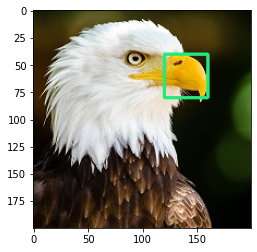

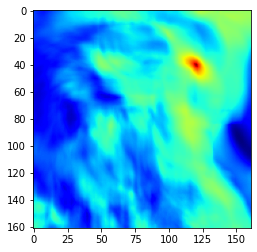

In [10]:
I = cv.imread('pic/eagle200x200.jpg')
T = I[40:80, 120:160]

res = cv.matchTemplate(I, T, cv.TM_CCOEFF_NORMED)
minv, maxv, minLoc, maxLoc = cv.minMaxLoc(res)

cv.rectangle(I, maxLoc, (maxLoc[0]+T.shape[1], maxLoc[1]+T.shape[0]), (123, 234, 34), 2)
show(I)

plt.imshow(res, cmap='jet')
plt.show()

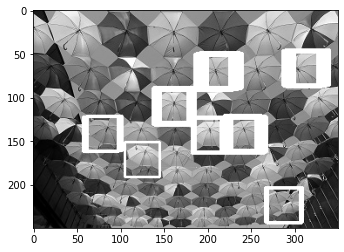

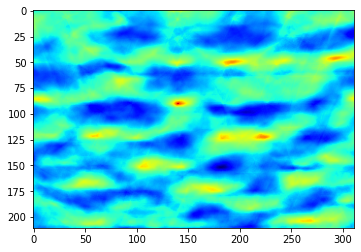

In [22]:
I = cv.imread('pic/umbrella250x350.jpg', 0)
T = I[90:130, 140:180]

res = cv.matchTemplate(I, T, cv.TM_CCOEFF_NORMED)
minv, maxv, minLoc, maxLoc = cv.minMaxLoc(res)

thresh = 0.5
ys, xs = np.where(res > thresh)
[cv.rectangle(I, (x,y), (x+T.shape[0], y+T.shape[1]), 255, 2) for (x,y) in zip(xs, ys)]

show(I)

plt.imshow(res, cmap='jet')
plt.show()

## 2. 基于梯度的模板匹配

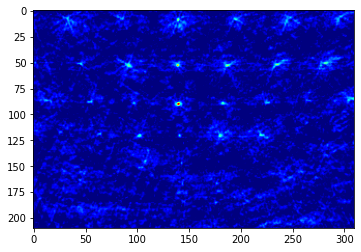

In [44]:
I = cv.imread('pic/umbrella250x350.jpg', 0)
T = I[90:130, 140:180]
h, w = T.shape

Ix = cv.Sobel(I, cv.CV_64F, 1, 0)
Iy = cv.Sobel(I, cv.CV_64F, 0, 1)

Tx = cv.Sobel(T, cv.CV_64F, 1, 0)
Ty = cv.Sobel(T, cv.CV_64F, 0, 1)

res = np.zeros((I.shape[0] - h, I.shape[1] - w))

for i in range(I.shape[0] - h):
    for j in range(I.shape[1] - w):
        Px = Ix[i:i+h, j:j+w]
        Py = Iy[i:i+h, j:j+w]
        
        up = Px * Tx + Py * Ty
        down = np.sqrt(Px**2 + Py**2) * np.sqrt(Tx**2 + Ty**2)
        
        score = (up / (down + 1e-9)).mean()
        res[i,j] = score

plt.imshow(res.clip(0, 0.5), cmap='jet')
plt.show()

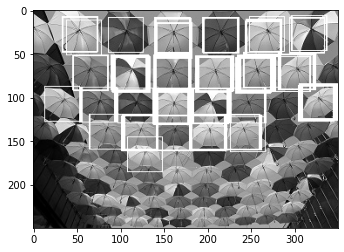

In [48]:
thresh = 0.15
ys, xs = np.where(res > thresh)
[cv.rectangle(I, (x,y), (x+w, y+h), 255, 1) for (x,y) in zip(xs, ys)]
show(I)